<h1 align="center" style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">Sentiment Analysis of Twitter Posts Using Bag of Words</h1>

<a id="import"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">1. Import Libraries and Load Dataset</h2>

In [1]:
import numpy as np
import pandas as pd
 
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)
pd.set_option('display.float_format', '{:.2f}'.format)

import warnings
import time
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
raw_df = pd.read_csv('Tweets.csv')

data source: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment/data

<a id="data_preview"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">2. Dataset Preview</h2>

In [4]:
raw_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.00,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.35,NaN,0.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.68,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.00,Bad Flight,0.70,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.00,Can't Tell,1.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
raw_df.airline.unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [7]:
raw_df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [8]:
positive_df = raw_df[raw_df.airline_sentiment == 'positive']
negative_df = raw_df[raw_df.airline_sentiment == 'negative']
neutral_df = raw_df[raw_df.airline_sentiment == 'neutral']

In [9]:
# Show the first ten postive sentiments
positive_df.text.values[:10]

array(["@VirginAmerica plus you've added commercials to the experience... tacky.",
       '@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)',
       "@virginamerica Well, I didn't…but NOW I DO! :-D",
       "@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",
       '@VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D',
       "@VirginAmerica This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven't even gone on my 1st trip yet! ;p",
       "@VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn",
       '@VirginAmerica Thanks!',
       "@VirginAmerica So excited for my first cross country flight LAX to MCO I've heard nothing but great things about Virgin America. #29DaysToGo",
       'I ❤️ flying @VirginAmerica. ☺️👍'], dtype=object)

In [10]:
# Show the first ten negative sentiments
negative_df.text.values[:10]

array(['@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
       "@VirginAmerica and it's a really big bad thing about it",
       "@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA",
       '@VirginAmerica SFO-PDX schedule is still MIA.',
       "@VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!",
       '@VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select???',
       '@VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet',
       "@VirginAmerica status match program.  I applied and it's been three weeks.  Called and emailed with no response.",
       "@VirginAmerica What ha

In [11]:
# Show the first ten neutral sentiments
neutral_df.text.values[:10]

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       '@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP',
       '@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24',
       '@VirginAmerica will you be making BOS&gt;LAS non stop permanently anytime soon?',
       "@VirginAmerica do you miss me? Don't worry we'll be together very soon.",
       '@VirginAmerica LAX to EWR - Middle seat on a red eye. Such a noob maneuver. #sendambien #andchexmix',
       '@VirginAmerica Are the hours of operation for the Club at SFO that are posted online current?',
       'Nice RT @VirginAmerica: Vibe with the moodlight from takeoff to touchdown. #MoodlitMonday #ScienceBehindTheExperience http://t.co/Y7O0uNxTQP',
       '@VirginAmerica when can I book my flight to Hawaii??'],
      dtype=object)

In [12]:
raw_df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [13]:
raw_df['airline_sentiment'].value_counts(normalize=True)

negative   0.63
neutral    0.21
positive   0.16
Name: airline_sentiment, dtype: float64

<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3. Exploratory Data Analysis</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [14]:
# !pip install WordCloud

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
sns.set_style("darkgrid")

from wordcloud import WordCloud

In [16]:
# plot_color = ['#008080', 'black']
plot_color = ['#FF6F61', '#008080']
sns.set_palette(['#008080', 'black'])

<a id="eda"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3.1. Sentiment Class Proportion</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [17]:
class_count = raw_df['airline_sentiment'].value_counts()
class_count

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

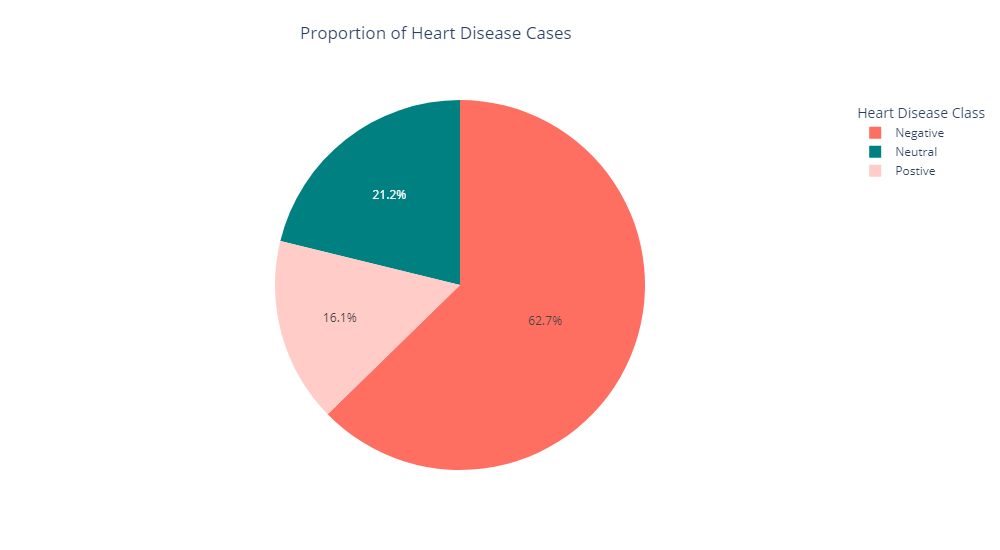

In [18]:
fig = px.pie(
    class_count, values=class_count.values,  names=['Negative', 'Neutral', 'Postive'],
    title='Proportion of Heart Disease Cases',
    color_discrete_sequence=plot_color,
)

fig.update_layout(legend_title_text='Heart Disease Class', title_x=0.3, title_y=0.95,)
fig.show('png', width=1000, height=550)

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3.2. Word Cloud</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [19]:
all_text = ' '.join(raw_df['text'])

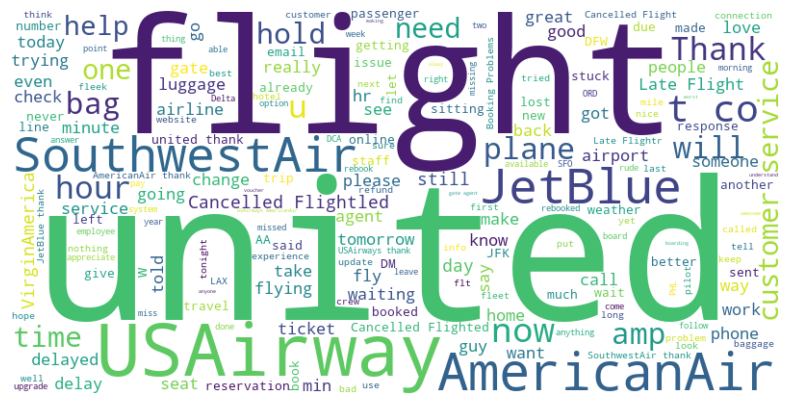

In [20]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4. Text Preprocessing Techniques</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [21]:
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
nltk.download('popular')

In [22]:
def preprocess_tweet(tweet):
    # Remove links
    tweet = re.sub(r'http\S+', '', tweet)
    
    # Remove @username
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Tokenization
    tokens = word_tokenize(tweet)
    
    # Remove punctuation and convert to lowercase
    tokens = [word.lower() for word in tokens if word.isalnum()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Perform lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens

In [23]:
# Show the first ten postive sentiments
positive_df.text.values[:10]

array(["@VirginAmerica plus you've added commercials to the experience... tacky.",
       '@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)',
       "@virginamerica Well, I didn't…but NOW I DO! :-D",
       "@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",
       '@VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D',
       "@VirginAmerica This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven't even gone on my 1st trip yet! ;p",
       "@VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlXHhKiyn",
       '@VirginAmerica Thanks!',
       "@VirginAmerica So excited for my first cross country flight LAX to MCO I've heard nothing but great things about Virgin America. #29DaysToGo",
       'I ❤️ flying @VirginAmerica. ☺️👍'], dtype=object)

In [24]:
# Test preprocessing function

for tweet in positive_df.text.values[:10]:
    print(preprocess_tweet(tweet))

['plus', 'added', 'commercial', 'experience', 'tacky']
['yes', 'nearly', 'every', 'time', 'fly', 'vx', 'ear', 'worm', 'go', 'away']
['well']
['amazing', 'arrived', 'hour', 'early', 'good']
['lt', '3', 'pretty', 'graphic', 'much', 'better', 'minimal', 'iconography']
['great', 'deal', 'already', 'thinking', '2nd', 'trip', 'amp', 'even', 'gone', '1st', 'trip', 'yet', 'p']
['flying', 'fabulous', 'seductive', 'sky', 'u', 'take', 'stress', 'away', 'travel']
['thanks']
['excited', 'first', 'cross', 'country', 'flight', 'lax', 'mco', 'heard', 'nothing', 'great', 'thing', 'virgin', 'america', '29daystogo']
['flying']


<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5. Implement Bag of Words</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [25]:
vectorizer = CountVectorizer(lowercase=True,
                             tokenizer=preprocess_tweet)

In [26]:
sparse_output = vectorizer.fit_transform(raw_df.text)

In [27]:
output = sparse_output.toarray()

<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">6. Model Building</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(sparse_output, raw_df.airline_sentiment, test_size=0.2, random_state=42)

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
model = RandomForestClassifier()

In [32]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
train_preds = model.predict(X_train)
train_preds

array(['negative', 'negative', 'positive', ..., 'negative', 'negative',
       'neutral'], dtype=object)

In [34]:
pd.Series(train_preds).value_counts()

negative    7269
neutral     2527
positive    1916
dtype: int64

<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7. Evaluate Model</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [36]:
y_pred = model.predict(X_test)

In [37]:
pd.Series(y_pred).value_counts()

negative    2076
neutral      474
positive     378
dtype: int64

In [38]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [39]:
scores = [(recall, precision, f1, accuracy)]

metric = pd.DataFrame(scores, columns=['Recall','Precision','F1 Score', 'Accuracy'])
metric.insert(0, 'Model', 'Random Forest')
metric

,Model,Recall,Precision,F1 Score,Accuracy
0,Random Forest,0.77,0.76,0.76,0.77
